<a href="https://colab.research.google.com/github/RahulKr-Amour/FlightPredictionDelay/blob/main/Final_BTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
flightsinfo = pd.read_csv("drive/My Drive/Colab Notebooks/flights.csv")

<ipython-input-3-eb2ae2dc8115>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flightsinfo = pd.read_csv("drive/My Drive/Colab Notebooks/flights.csv")


In [ ]:
list(flightsinfo.columns)

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [4]:
airport = pd.read_csv('drive/My Drive/Colab Notebooks/airports.csv')
airlines = pd.read_csv('drive/My Drive/Colab Notebooks/airlines.csv')

In [ ]:
flightsinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
flightsinfo.shape

(5819079, 31)

In [ ]:
flightsinfo.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [ ]:
flightsinfo.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flightsinfo

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airlinecompanies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [ ]:
airlinecompanies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

<ipython-input-13-d6dae4de5e44>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


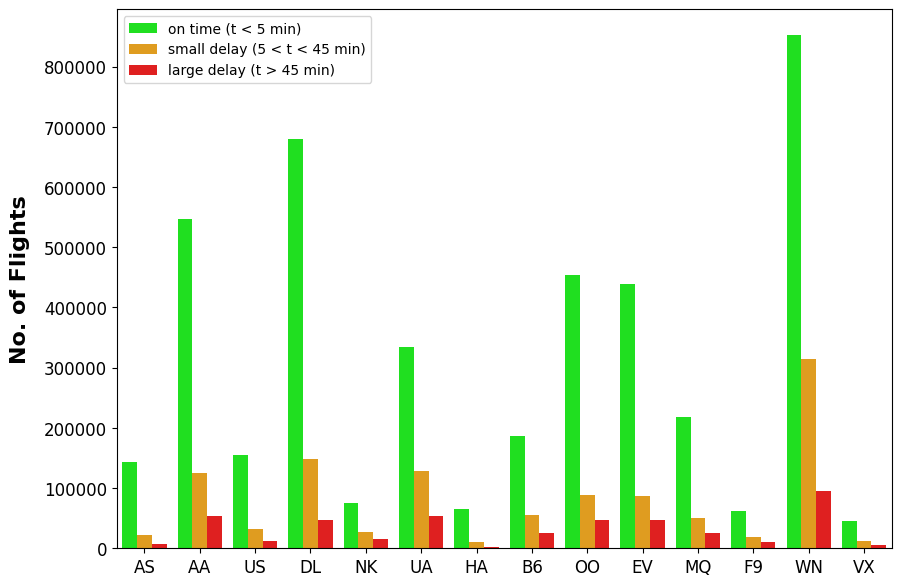

In [ ]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flightsinfo['DELAY_LEVEL'] = flightsinfo['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="AIRLINE", hue='DELAY_LEVEL', data=flightsinfo, palette= ["#00FF00","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

<ipython-input-14-7e30b0452dc9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flightsinfo, color="orange", ci=None)
<ipython-input-14-7e30b0452dc9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=flightsinfo, color="b", hatch = 'X',
<ipython-input-14-7e30b0452dc9>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


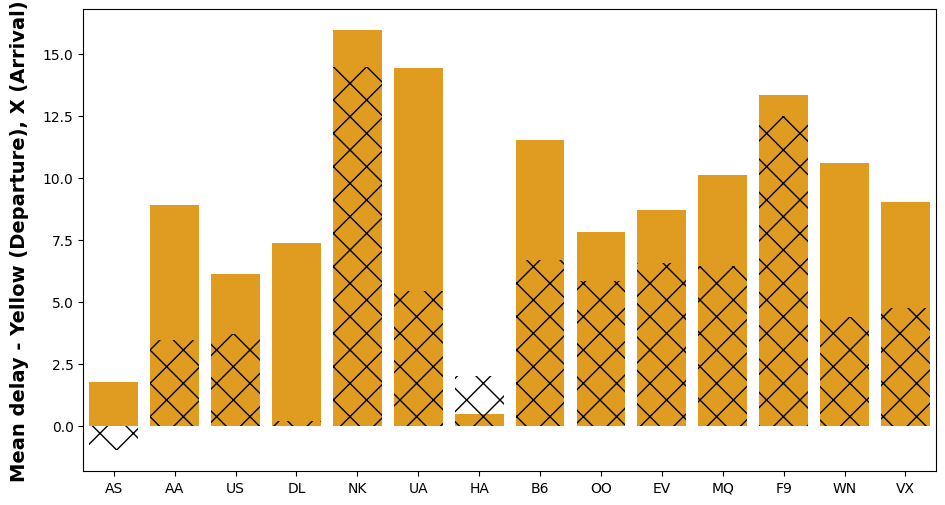

In [ ]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flightsinfo, color="orange", ci=None)
ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=flightsinfo, color="b", hatch = 'X',
                 alpha = 0.0, ci=None)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)
plt.ylabel('Mean delay - Yellow (Departure), X (Arrival)',
           fontsize=14, weight = 'bold', labelpad=10);

In [ ]:
from mpl_toolkits.basemap import Basemap

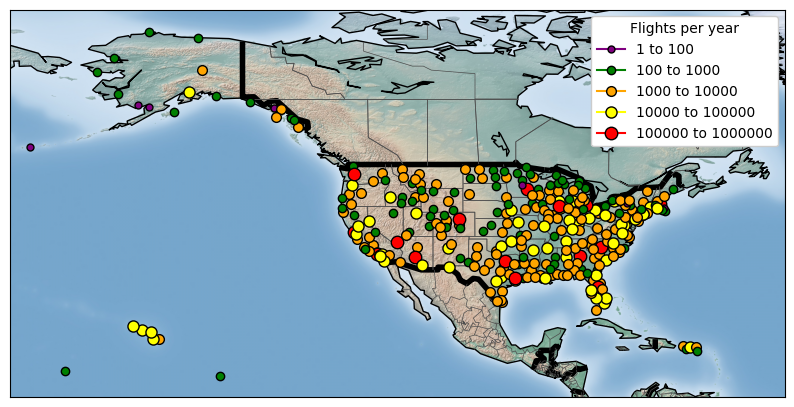

In [ ]:
import matplotlib.pyplot as plt
from collections import OrderedDict
flightcount = flightsinfo['ORIGIN_AIRPORT'].value_counts()

plt.figure(figsize=(10,10))

colors = ['purple', 'green', 'orange','yellow', 'red', 'lightblue']
size = [1, 100, 1000, 10000, 100000, 1000000]
labels = ["1 to 100", "100 to 1000", "1000 to 10000", "10000 to 100000", "100000 to 1000000"]

map = Basemap(llcrnrlon=-180, urcrnrlon=-50, llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 4)
map.drawstates(color='0.3')

for index, (code, y,x) in airport[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size) if val < flightcount[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind], markeredgecolor='k', label = labels[ind])

handles, labels = plt.gca().get_legend_handles_labels()
labels_ord = OrderedDict(zip(labels, handles))
keys = ('1 to 100','100 to 1000', '1000 to 10000', '10000 to 100000', '100000 to 1000000')
lnew = OrderedDict()
for item in keys:
    lnew[item] = labels_ord[item]
plt.legend(lnew.values(), lnew.keys(), loc = 1, prop= {'size':10}, title='Flights per year', frameon = True, framealpha = 1)
plt.show()

In [ ]:
airport.isnull().sum()

,0
IATA_CODE,0
AIRPORT,0
CITY,0
STATE,0
COUNTRY,0
LATITUDE,3
LONGITUDE,3


In [6]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [ ]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [ ]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [7]:
flightsinfo_NULL = flightsinfo.isnull().sum()*100/flightsinfo.shape[0]
flightsinfo_NULL

,0
YEAR,0.000000
MONTH,0.000000
DAY,0.000000
DAY_OF_WEEK,0.000000
AIRLINE,0.000000
FLIGHT_NUMBER,0.000000
TAIL_NUMBER,0.252978
ORIGIN_AIRPORT,0.000000
DESTINATION_AIRPORT,0.000000
SCHEDULED_DEPARTURE,0.000000


In [8]:
flightsinfo1 = flightsinfo.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [ ]:
flightsinfo1.shape

(5714008, 32)

In [ ]:
flightsinfo.shape

(5819079, 32)

In [ ]:
flightsinfo1.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [9]:
flightsinfo_modified = flightsinfo1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flightsinfo_modified = flightsinfo_modified.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [ ]:
flightsinfo_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063439 entries, 27 to 5819071
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   AIRLINE              1063439 non-null  object 
 1   ORIGIN_AIRPORT       1063439 non-null  object 
 2   DESTINATION_AIRPORT  1063439 non-null  object 
 3   DEPARTURE_DELAY      1063439 non-null  float64
 4   TAXI_OUT             1063439 non-null  float64
 5   ELAPSED_TIME         1063439 non-null  float64
 6   DISTANCE             1063439 non-null  int64  
 7   TAXI_IN              1063439 non-null  float64
 8   ARRIVAL_DELAY        1063439 non-null  float64
 9   AIR_SYSTEM_DELAY     1063439 non-null  float64
 10  SECURITY_DELAY       1063439 non-null  float64
 11  AIRLINE_DELAY        1063439 non-null  float64
 12  LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 13  WEATHER_DELAY        1063439 non-null  float64
 14  DELAY_LEVEL          1063439 non-null  int64  
dtypes:

In [10]:
Flight_Delays = flightsinfo_modified

In [ ]:
# @title Dropping all the contributing factors of delays as we are only going to focus on the over all delay


In [11]:
flightsinfo2 = flightsinfo1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [ ]:
flightsinfo2.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [ ]:
flightsinfo2.shape

(5714008, 26)

In [ ]:
flightsinfo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24  CAN

In [ ]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [ ]:
flightsinfo2.DEPARTURE_TIME

,DEPARTURE_TIME
0,2354.0
1,2.0
2,18.0
3,15.0
4,24.0
...,...
5819074,2355.0
5819075,2355.0
5819076,2350.0
5819077,2353.0


In [ ]:
# @title The times are not in the correct format so i will transform them into HH:MM format

In [12]:
def CreateTimeFormatted(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [13]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Departure']

,Actual_Departure
0,23:54:00
1,00:02:00
2,00:18:00
3,00:15:00
4,00:24:00
...,...
5819074,23:55:00
5819075,23:55:00
5819076,23:50:00
5819077,23:53:00


In [ ]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'DELAY_LEVEL',
       'Actual_Departure'],
      dtype='object')

In [ ]:
# @title Transform year month and day into date time format

In [14]:
flightsinfo2['Date'] = pd.to_datetime(flightsinfo2[['YEAR','MONTH','DAY']])
flightsinfo2.Date

,Date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
5819074,2015-12-31
5819075,2015-12-31
5819076,2015-12-31
5819077,2015-12-31


In [15]:
flightsinfo2['Day'] = flightsinfo2['Date'].dt.day_name

In [16]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Arrival'] =flightsinfo1['SCHEDULED_ARRIVAL'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Departure'] =flightsinfo1['SCHEDULED_DEPARTURE'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Arrival'] =flightsinfo2['ARRIVAL_TIME'].apply(CreateTimeFormatted)

flightsinfo2 = flightsinfo2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

flightsinfo2 = flightsinfo2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

flightsinfo2 = flightsinfo2.rename(columns={"AIRLINE_y":"AIRLINE"})

flightsinfo2 = flightsinfo2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flightsinfo2 = flightsinfo2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [ ]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DELAY_LEVEL', 'Actual_Departure', 'Date',
       'Day', 'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival',
       'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [17]:
flightsinfo2 = flightsinfo2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [18]:
flightsinfo2 = flightsinfo2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [ ]:
flightsinfo2.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,2336,N3KUAA,LAX,PBI,10,2.0,...,07:50:00,00:10:00,07:41:00,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,PBI,Palm Beach International Airport,West Palm Beach
2,2015,1,1,4,840,N171US,SFO,CLT,20,18.0,...,08:06:00,00:20:00,08:11:00,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CLT,Charlotte Douglas International Airport,Charlotte
3,2015,1,1,4,258,N3HYAA,LAX,MIA,20,15.0,...,08:05:00,00:20:00,07:56:00,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,MIA,Miami International Airport,Miami
4,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,03:20:00,00:25:00,02:59:00,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,ANC,Ted Stevens Anchorage International Airport,Anchorage
5,2015,1,1,4,806,N3730B,SFO,MSP,25,20.0,...,06:02:00,00:25:00,06:10:00,Delta Air Lines Inc.,SFO,San Francisco International Airport,San Francisco,MSP,Minneapolis-Saint Paul International Airport,Minneapolis
6,2015,1,1,4,612,N635NK,LAS,MSP,25,19.0,...,05:26:00,00:25:00,05:09:00,Spirit Air Lines,LAS,McCarran International Airport,Las Vegas,MSP,Minneapolis-Saint Paul International Airport,Minneapolis
7,2015,1,1,4,2013,N584UW,LAX,CLT,30,44.0,...,08:03:00,00:30:00,07:53:00,US Airways Inc.,LAX,Los Angeles International Airport,Los Angeles,CLT,Charlotte Douglas International Airport,Charlotte
8,2015,1,1,4,1112,N3LAAA,SFO,DFW,30,19.0,...,05:45:00,00:30:00,05:32:00,American Airlines Inc.,SFO,San Francisco International Airport,San Francisco,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth
9,2015,1,1,4,1173,N826DN,LAS,ATL,30,33.0,...,07:11:00,00:30:00,06:56:00,Delta Air Lines Inc.,LAS,McCarran International Airport,Las Vegas,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta


In [19]:
data_vizual = pd.DataFrame(flightsinfo2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [ ]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [20]:
data_vizual = data_vizual.dropna(subset = ['Actual_Departure','Actual_Arrival'])
data_vizual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5219244 entries, 0 to 5221999
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   AIRLINE              object        
 1   Org_Airport_Name     object        
 2   Origin_city          object        
 3   Dest_Airport_Name    object        
 4   Destination_city     object        
 5   ORIGIN_AIRPORT       object        
 6   DESTINATION_AIRPORT  object        
 7   DISTANCE             int64         
 8   Actual_Departure     object        
 9   Date                 datetime64[ns]
 10  Day                  object        
 11  Scheduled_Departure  object        
 12  DEPARTURE_DELAY      float64       
 13  Actual_Arrival       object        
 14  Scheduled_Arrival    object        
 15  ARRIVAL_DELAY        float64       
 16  SCHEDULED_TIME       float64       
 17  ELAPSED_TIME         float64       
 18  AIR_TIME             float64       
 19  TAXI_IN              float

In [21]:
Flights = data_vizual
Flights.head(10)

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,American Airlines Inc.,Los Angeles International Airport,Los Angeles,Palm Beach International Airport,West Palm Beach,LAX,PBI,2330,00:02:00,2015-01-01,...,-8.0,07:41:00,07:50:00,-9.0,280.0,279.0,263.0,4.0,12.0,0
2,US Airways Inc.,San Francisco International Airport,San Francisco,Charlotte Douglas International Airport,Charlotte,SFO,CLT,2296,00:18:00,2015-01-01,...,-2.0,08:11:00,08:06:00,5.0,286.0,293.0,266.0,11.0,16.0,0
3,American Airlines Inc.,Los Angeles International Airport,Los Angeles,Miami International Airport,Miami,LAX,MIA,2342,00:15:00,2015-01-01,...,-5.0,07:56:00,08:05:00,-9.0,285.0,281.0,258.0,8.0,15.0,0
4,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,Ted Stevens Anchorage International Airport,Anchorage,SEA,ANC,1448,00:24:00,2015-01-01,...,-1.0,02:59:00,03:20:00,-21.0,235.0,215.0,199.0,5.0,11.0,0
5,Delta Air Lines Inc.,San Francisco International Airport,San Francisco,Minneapolis-Saint Paul International Airport,Minneapolis,SFO,MSP,1589,00:20:00,2015-01-01,...,-5.0,06:10:00,06:02:00,8.0,217.0,230.0,206.0,6.0,18.0,0
6,Spirit Air Lines,McCarran International Airport,Las Vegas,Minneapolis-Saint Paul International Airport,Minneapolis,LAS,MSP,1299,00:19:00,2015-01-01,...,-6.0,05:09:00,05:26:00,-17.0,181.0,170.0,154.0,5.0,11.0,0
7,US Airways Inc.,Los Angeles International Airport,Los Angeles,Charlotte Douglas International Airport,Charlotte,LAX,CLT,2125,00:44:00,2015-01-01,...,14.0,07:53:00,08:03:00,-10.0,273.0,249.0,228.0,8.0,13.0,0
8,American Airlines Inc.,San Francisco International Airport,San Francisco,Dallas/Fort Worth International Airport,Dallas-Fort Worth,SFO,DFW,1464,00:19:00,2015-01-01,...,-11.0,05:32:00,05:45:00,-13.0,195.0,193.0,173.0,3.0,17.0,0
9,Delta Air Lines Inc.,McCarran International Airport,Las Vegas,Hartsfield-Jackson Atlanta International Airport,Atlanta,LAS,ATL,1747,00:33:00,2015-01-01,...,3.0,06:56:00,07:11:00,-15.0,221.0,203.0,186.0,5.0,12.0,0


<ipython-input-45-9fcf87e9f032>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(y=Flights['Origin_city'], data = Flights,
<ipython-input-45-9fcf87e9f032>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_yticklabels(axis.get_yticklabels())


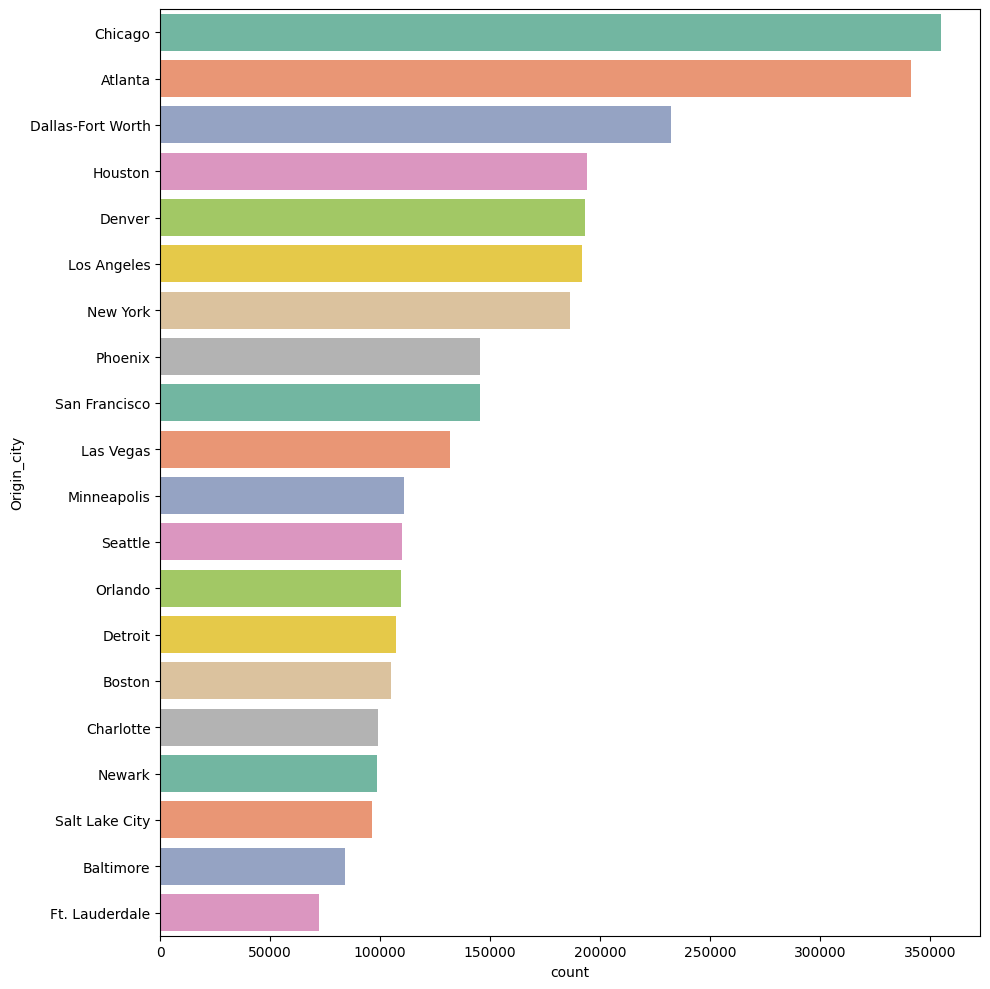

In [ ]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(y=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index,palette="Set2")
axis.set_yticklabels(axis.get_yticklabels())
plt.tight_layout()
plt.show()

<ipython-input-46-22d3873a04e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, dodge=True, jitter=True,palette="Set1")


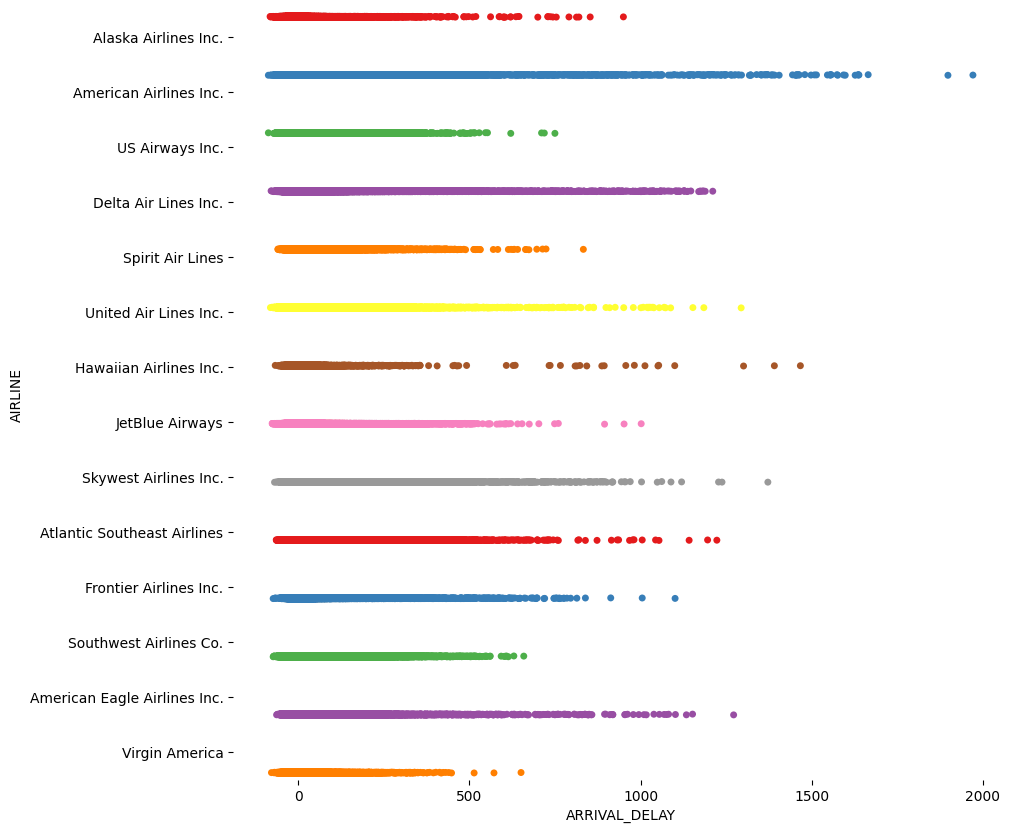

In [ ]:
axis = plt.subplots(figsize=(10,10))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, dodge=True, jitter=True,palette="Set1")
plt.show()

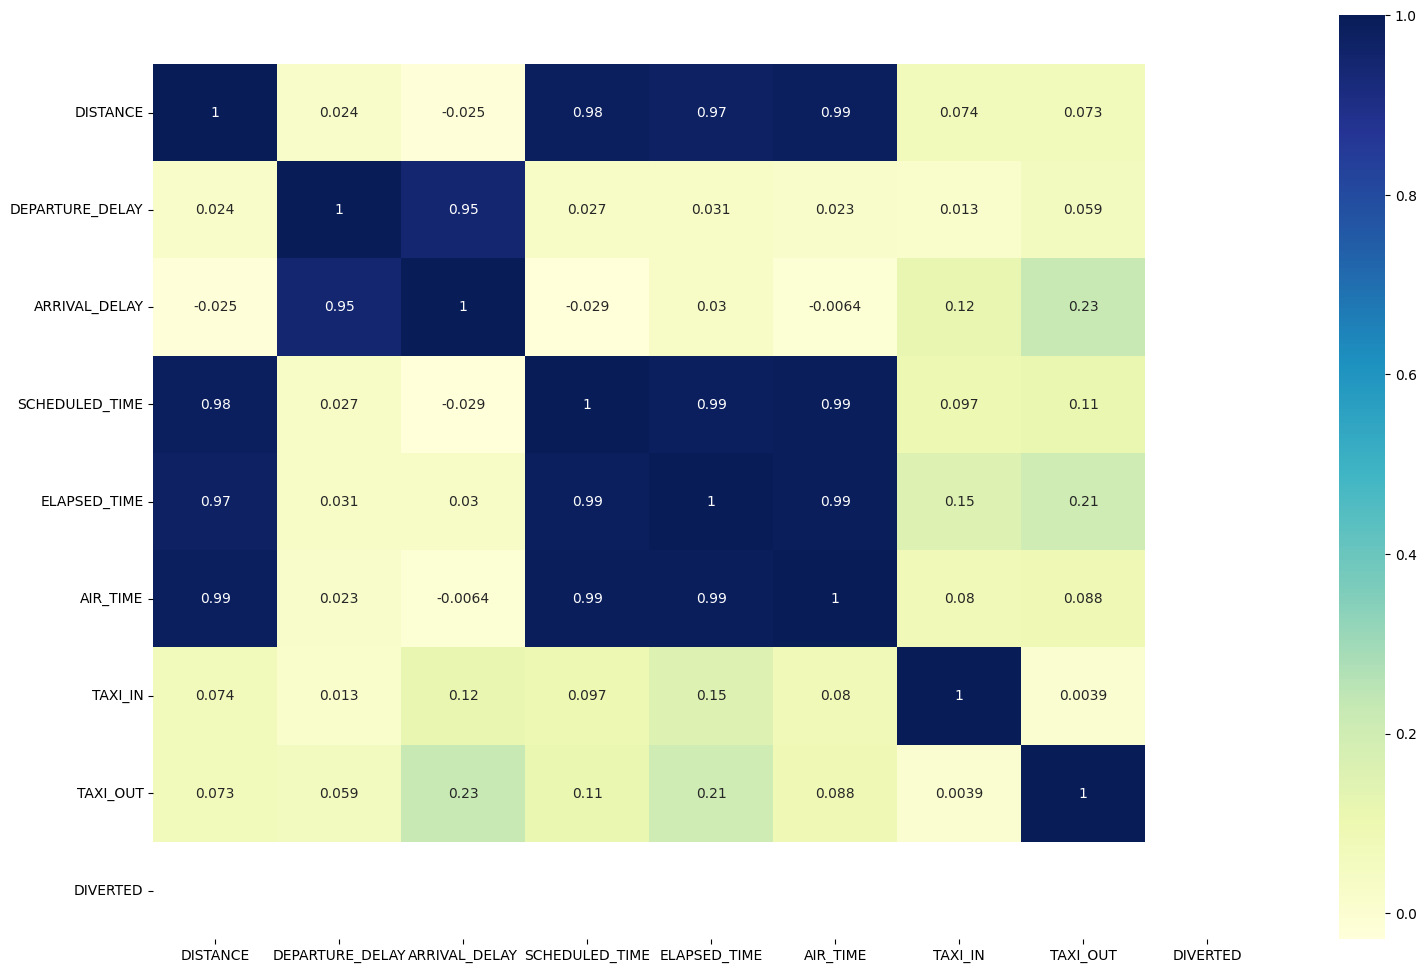

In [ ]:
axis = plt.subplots(figsize=(18,12))
numerical_flights = Flights.select_dtypes(include=np.number)
sns.heatmap(numerical_flights.corr(),annot = True,cmap="YlGnBu")
b, t = plt.ylim()
t -= 0.5
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [ ]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,American Airlines Inc.,Los Angeles International Airport,Los Angeles,Palm Beach International Airport,West Palm Beach,LAX,PBI,2330,00:02:00,2015-01-01,...,-8.0,07:41:00,07:50:00,-9.0,280.0,279.0,263.0,4.0,12.0,0
2,US Airways Inc.,San Francisco International Airport,San Francisco,Charlotte Douglas International Airport,Charlotte,SFO,CLT,2296,00:18:00,2015-01-01,...,-2.0,08:11:00,08:06:00,5.0,286.0,293.0,266.0,11.0,16.0,0
3,American Airlines Inc.,Los Angeles International Airport,Los Angeles,Miami International Airport,Miami,LAX,MIA,2342,00:15:00,2015-01-01,...,-5.0,07:56:00,08:05:00,-9.0,285.0,281.0,258.0,8.0,15.0,0
4,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,Ted Stevens Anchorage International Airport,Anchorage,SEA,ANC,1448,00:24:00,2015-01-01,...,-1.0,02:59:00,03:20:00,-21.0,235.0,215.0,199.0,5.0,11.0,0


In [22]:
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

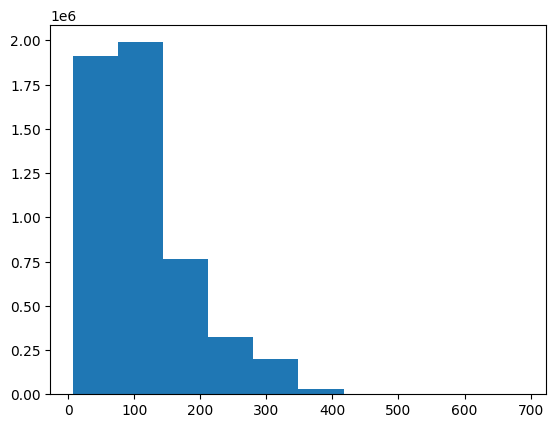

In [ ]:
plt.hist(Flights1['AIR_TIME'])
plt.show()

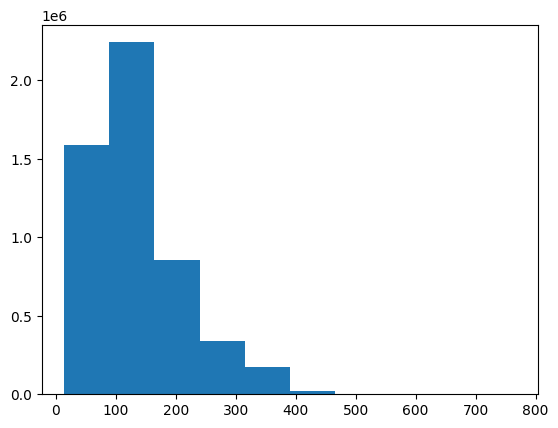

In [ ]:
plt.hist(Flights1['ELAPSED_TIME'])
plt.show()

In [ ]:
# @title Regression predicting Arrival Delay

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [ ]:
# @title Label encoder to convert text values to numbers

In [25]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [26]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5219244 entries, 0 to 5221999
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   AIRLINE              int64  
 1   ORIGIN_AIRPORT       int64  
 2   DESTINATION_AIRPORT  int64  
 3   DISTANCE             int64  
 4   Day                  int64  
 5   DEPARTURE_DELAY      float64
 6   ARRIVAL_DELAY        float64
 7   SCHEDULED_TIME       float64
 8   ELAPSED_TIME         float64
 9   AIR_TIME             float64
 10  TAXI_IN              float64
 11  TAXI_OUT             float64
 12  DIVERTED             int64  
dtypes: float64(7), int64(6)
memory usage: 557.5 MB


In [27]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(5219244, 12)

In [28]:
y = Flights1['ARRIVAL_DELAY']
y.head()

,ARRIVAL_DELAY
0,-22.0
1,-9.0
2,5.0
3,-9.0
4,-21.0


In [ ]:
# @title Train and Test set splitting


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [30]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [ ]:
# @title Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

fitResult = LinR.fit(X_train_sc,y_train)
y_pred = fitResult.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, y_pred))
print ('MSE:' , mean_squared_error(y_test, y_pred))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:' , r2_score(y_test, y_pred))

MAE: 6.754010505629067e-07
MSE: 6.975308979724741e-13
RMSE: 8.351831523519103e-07
R2: 0.9999999999999996


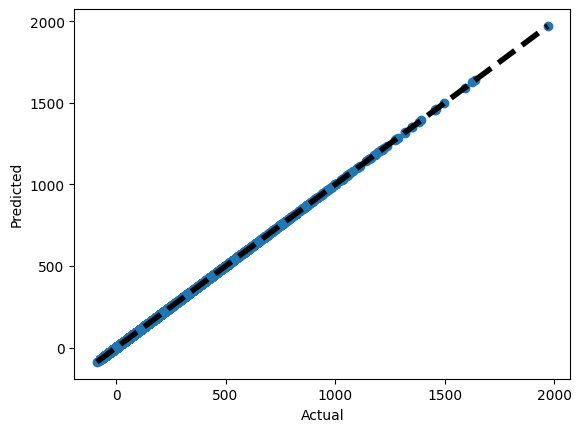

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [33]:
# @title Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train_sc,y_train)
predictedValues = fitResultdtc.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 0.917273076330595
MSE: 8.379271787255012
RMSE: 2.894697184034111
R2: 0.9946716726069066


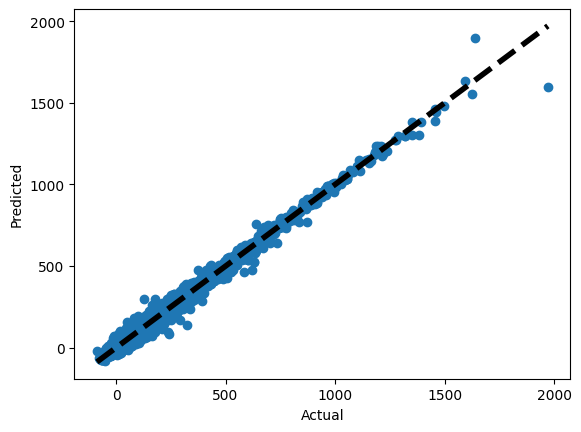

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [37]:
# @title Boosted Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

LinR = LinearRegression()

fitResult = LinR.fit(X_train_sc,y_train)
y_pred = fitResult.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, y_pred))
print ('MSE:' , mean_squared_error(y_test, y_pred))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:' , r2_score(y_test, y_pred))

MAE: 6.754010505629067e-07
MSE: 6.975308979724741e-13
RMSE: 8.351831523519103e-07
R2: 0.9999999999999996


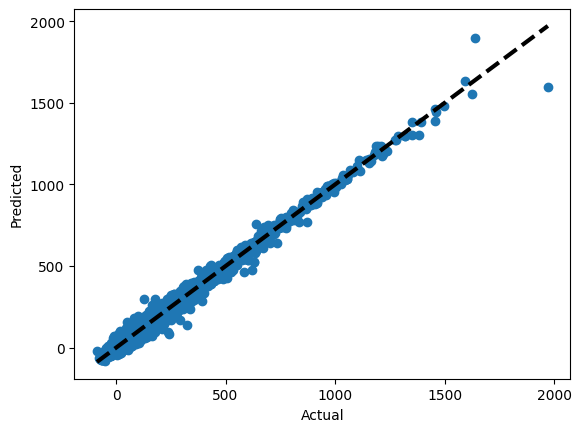

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [44]:
# @title Dropping Departure delay from set of attributes to try and predict Arrival Delay

In [32]:
X = Flights1.drop(['ARRIVAL_DELAY','DEPARTURE_DELAY'],axis = 1)
X.shape

(5219244, 11)

In [33]:
y = Flights1['DEPARTURE_DELAY']
y.head()

,DEPARTURE_DELAY
0,-11.0
1,-8.0
2,-2.0
3,-5.0
4,-1.0


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [54]:
# @title Boosted Linear Regression

In [56]:
from sklearn.ensemble import GradientBoostingRegressor # Import the boosted linear regression model

# Instantiate the model
Boost_Lin = GradientBoostingRegressor(random_state=2) # You can adjust parameters here if needed

fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
predictedValues = fitResultBl.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 18.8158335660914
MSE: 1368.5831209344942
RMSE: 36.99436607018012
R2: 0.013559935176441162


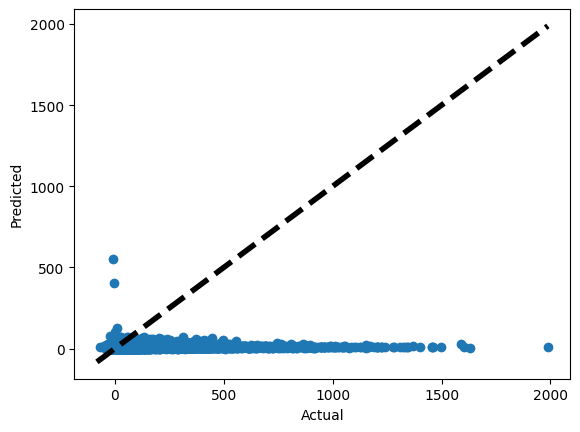

In [57]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [58]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
1331877,4,20,267,874,0,167.0,150.0,130.0,4.0,16.0,0
4905369,1,66,236,449,0,93.0,99.0,70.0,5.0,24.0,0
236042,9,192,159,971,0,145.0,151.0,129.0,6.0,16.0,0
5220003,9,285,237,647,0,105.0,94.0,83.0,4.0,7.0,0
3904633,12,192,227,1005,0,181.0,179.0,158.0,7.0,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3323195,4,105,20,746,0,162.0,150.0,118.0,10.0,22.0,0
1200754,9,37,194,395,0,85.0,81.0,67.0,4.0,10.0,0
1256483,8,151,85,420,0,94.0,92.0,70.0,8.0,14.0,0
310187,1,227,304,585,0,116.0,111.0,96.0,5.0,10.0,0


In [59]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,0,17,275,1448,0,-11.0,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,1,175,233,2330,0,-8.0,-9.0,280.0,279.0,263.0,4.0,12.0,0
2,11,276,66,2296,0,-2.0,5.0,286.0,293.0,266.0,11.0,16.0,0
3,1,175,202,2342,0,-5.0,-9.0,285.0,281.0,258.0,8.0,15.0,0
4,0,275,17,1448,0,-1.0,-21.0,235.0,215.0,199.0,5.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,7,175,39,2611,0,-4.0,-26.0,320.0,298.0,272.0,4.0,22.0,0
5221996,7,165,246,1617,0,-4.0,-16.0,227.0,215.0,195.0,3.0,17.0,0
5221997,7,165,283,1598,0,-9.0,-8.0,221.0,222.0,197.0,8.0,17.0,0
5221998,7,192,283,1189,0,-6.0,-10.0,161.0,157.0,144.0,3.0,10.0,0


In [35]:
Flights1['ORIGIN_AIRPORT'] = Flights1['ORIGIN_AIRPORT'].astype(str)
Flights1['DESTINATION_AIRPORT'] = Flights1['DESTINATION_AIRPORT'].astype(str)
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])

In [36]:
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)
Flights1
X = Flights1.drop(['ARRIVAL_DELAY','Is_Delayed'],axis = 1)
X.shape
y = Flights1['Is_Delayed']
y.head()

,Is_Delayed
0,0
1,0
2,1
3,0
4,0


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)
y_train.value_counts()

,count
Is_Delayed,
0,2294162
1,1359308


In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
pd.Series(y_train).value_counts()

,count
Is_Delayed,
0,2294162
1,2294162


In [41]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)
y_train

,Is_Delayed
0,0
1,0
2,0
3,1
4,1
...,...
4588319,1
4588320,1
4588321,1
4588322,1


In [68]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
20397,9,187,113,874,0,37.0,135.0,131.0,110.0,11.0,10.0,0
1235289,9,113,312,594,0,11.0,125.0,108.0,86.0,6.0,16.0,0
4233093,8,130,303,680,0,-6.0,130.0,111.0,91.0,4.0,16.0,0
3635667,3,143,128,108,0,11.0,54.0,54.0,29.0,4.0,21.0,0
4461483,8,143,277,196,0,20.0,66.0,98.0,67.0,6.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
509661,4,113,17,581,0,0.0,110.0,104.0,86.0,3.0,15.0,0
2137575,4,8,113,746,0,-5.0,145.0,121.0,103.0,5.0,13.0,0
2755117,7,93,151,846,0,-5.0,131.0,128.0,108.0,5.0,15.0,0
1200802,12,135,143,978,0,31.0,162.0,143.0,125.0,7.0,11.0,0


In [69]:
# @title Decision trees

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = None)
classifierDT.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy')

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
# Predicting the Test set results
y_pred = classifierDT.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
score = classifierDT.score(X_test_sc,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [74]:
cm

array([[834850, 149239],
       [535477,  46208]])

In [75]:
score

0.9825805001232617

In [77]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))

F1 score : 0.4140486478345572
Precision Score : 0.42282814827637877
Recall Score : 0.4638931249880859


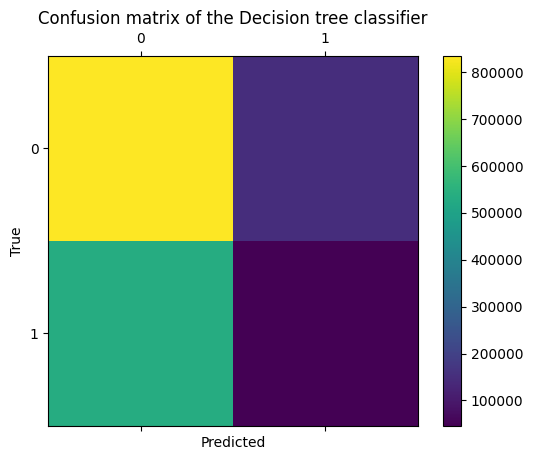

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Decision tree classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
# @title Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

In [45]:
y_pred = classifier.predict(X_test_sc)
from sklearn.metrics import confusion_matrix
# Making the Confusion Matrix
score = classifier.score(X_test_sc,y_test)
cm = confusion_matrix(y_test, y_pred)

In [46]:
cm

array([[984089,      0],
       [     0, 581685]])

In [47]:
score

1.0

In [49]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

y_pred = classifier.predict(X_test_sc)
# Making the Confusion Matrix
score = classifier.score(X_test_sc,y_test)
cm = confusion_matrix(y_test, y_pred)

cm

score

print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))

F1 score : 1.0
Precision Score : 1.0
Recall Score : 1.0


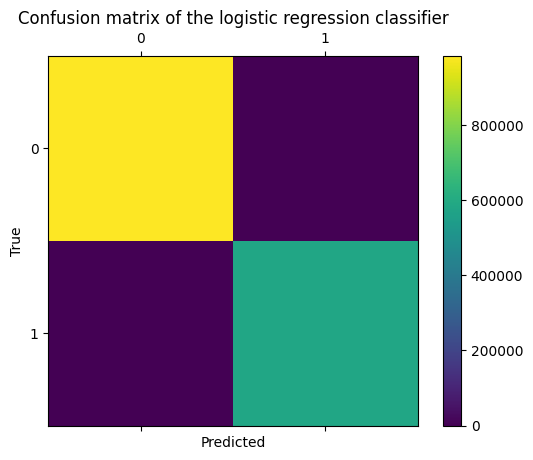

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the logistic regression classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [53]:
# @title END